In [11]:
#import numpy as np
import matplotlib.pyplot as plt
import random

# Simuler un chemin
def simuler_chemin(tree):
    n = len(tree)
    res = [tree[0][0]]
    noeuds_parcourus = [0]
    for niveau in range(n - 1):
        nombre_uniforme = random.random()
        if (nombre_uniforme < 1/2):
            noeuds_parcourus.append(noeuds_parcourus[-1])
            res.append(tree[niveau + 1][noeuds_parcourus[-1]])

        else :
            noeuds_parcourus.append(noeuds_parcourus[-1] + 1)
            res.append(tree[niveau + 1][noeuds_parcourus[-1]])

    return res


# Fonction pour calculer le prix d'une obligation à taux fixe avec la liste des taux d'actualisation
def prix_obligation(taux_interet, taux_act):
    maturite = len(taux_act)
    prix_total = 0
    for niveau in range(maturite - 1):
        prix_total += (100 * taux_interet) / (1 + taux_act[niveau])**(niveau + 1)

    prix_total += 100 * (1 + taux_interet) / (1 + taux_act[-1])**(maturite)

    return prix_total

# Arbre donné
tree_depth_4 = [
    [1.0],
    [0.9, 1.1],
    [0.8, 1.0, 1.2],
    [0.7, 0.9, 1.1, 1.3],
    [0.6, 0.8, 1.0, 1.2, 1.4]
]


In [7]:
#test
simuler_chemin(tree_depth_4)

[1.0, 0.9, 0.8, 0.9, 1.0]

In [16]:
#test
prix_obligation(0.05, [0.1, 0.11, 0.12, 0.125, 0.13])

72.27373661553383

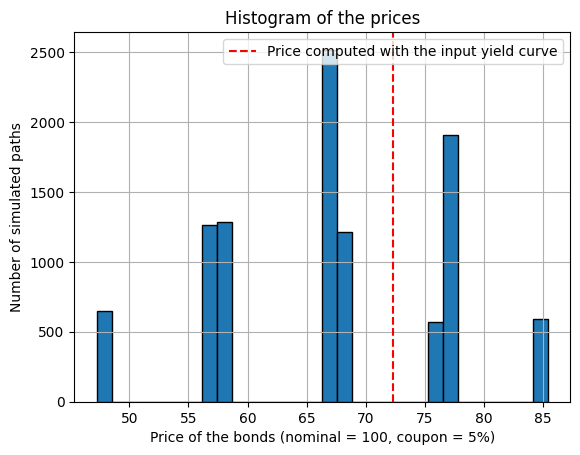

In [17]:
# Nombre de chemins à simuler
nombre_chemins = 10000

# Taux fixe de l'obligation
taux_interet = 0.05

# Arbre donné
tree_depth_4 = [
    [0.1],
    [0.0979, 0.1432],
    [0.0976, 0.1377, 0.1942],
    [0.0872, 0.1183, 0.1606, 0.2179],
    [0.0865, 0.1134, 0.1486, 0.1948, 0.2553]
]

# Liste pour stocker les prix des obligations à taux fixe pour chaque chemin
prix_obligations = []

# Simulation des chemins et calcul des prix des obligations à taux fixe
for _ in range(nombre_chemins):
    chemin = simuler_chemin(tree_depth_4)
    prix_obligation_chemin = prix_obligation(taux_interet, chemin)
    prix_obligations.append(prix_obligation_chemin)

# Prix donné avec la yield curve
prix = prix_obligation(taux_interet, [0.1, 0.11, 0.12, 0.125, 0.13])

# Tracer l'histogramme des prix des obligations à taux fixe
plt.hist(prix_obligations, bins=30, edgecolor='black')
plt.axvline(x=prix, color='r', linestyle='--',  label='Price computed with the input yield curve')
plt.xlabel('Price of the bonds (nominal = 100, coupon = 5%)')
plt.ylabel('Number of simulated paths')
plt.title('Histogram of the prices')
plt.legend()
plt.grid(True)
plt.show()